# Reference
https://www.kaggle.com/pankajjsh06/will-employee-leave-the-company-or-not

In [2]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/kaggle/input/hr-analytics-case-study/out_time.csv
/kaggle/input/hr-analytics-case-study/general_data.csv
/kaggle/input/hr-analytics-case-study/employee_survey_data.csv
/kaggle/input/hr-analytics-case-study/data_dictionary.xlsx
/kaggle/input/hr-analytics-case-study/manager_survey_data.csv
/kaggle/input/hr-analytics-case-study/in_time.csv


In [19]:
df = pd.read_csv("/kaggle/input/hr-analytics-case-study/general_data.csv",sep=",")

In [20]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [21]:
df.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [22]:
df.fillna(0,inplace=True)

In [23]:
df.drop(['EmployeeCount','EmployeeID','StandardHours'],axis=1, inplace = True)

In [24]:
corr_cols = df[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

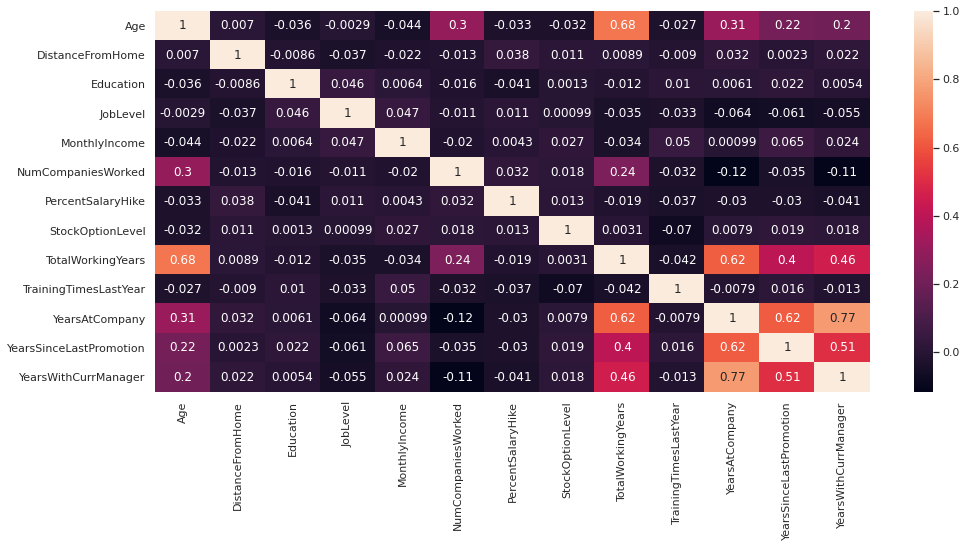

In [25]:
corr = corr_cols.corr()
plt.figure(figsize=(16,7))
sns.heatmap(corr,annot=True)
plt.show()

In [26]:
print(len(df))
print(len(df[df['Attrition']=='Yes']))
print(len(df[df['Attrition']=='No']))
print("percentage of yes Attrition is:",(len(df[df['Attrition']=='Yes'])/len(df))*100,"%")
print("percentage of no Attrition is:",(len(df[df['Attrition']=='No'])/len(df))*100,"%")

4410
711
3699
percentage of yes Attrition is: 16.122448979591837 %
percentage of no Attrition is: 83.87755102040816 %


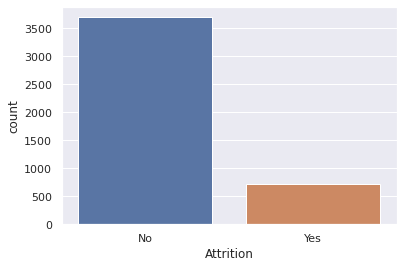

In [27]:
sns.countplot(x = "Attrition",data=df)
plt.show()

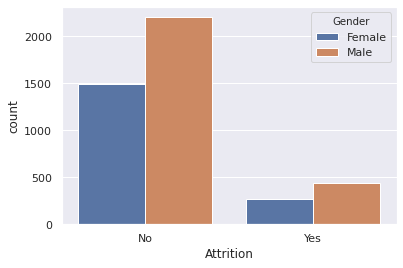

In [28]:
sns.countplot(x = "Attrition",data=df,hue="Gender")
plt.show()

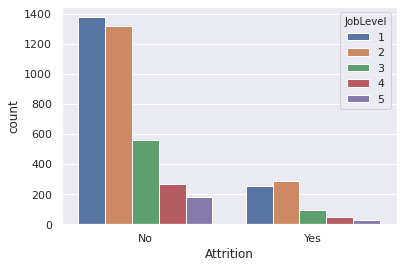

In [29]:
sns.countplot(x = "Attrition",data=df,hue="JobLevel")
plt.show()

In [30]:
def Age(dataframe):
    dataframe.loc[dataframe['Age'] <= 30,'Age'] = 1
    dataframe.loc[(dataframe['Age'] > 30) & (dataframe['Age'] <= 40), 'Age'] = 2
    dataframe.loc[(dataframe['Age'] > 40) & (dataframe['Age'] <= 50), 'Age'] = 3
    dataframe.loc[(dataframe['Age'] > 50) & (dataframe['Age'] <= 60), 'Age'] = 4
    return dataframe

Age(df); 

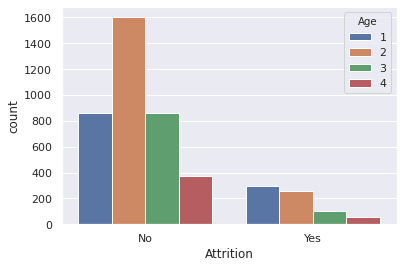

In [31]:
sns.countplot(x = "Attrition",data=df,hue="Age")
plt.show()

In [32]:
print(df['BusinessTravel'].unique())
print(df['Department'].unique())
print(df['EducationField'].unique())
print(df['Gender'].unique())
print(df['JobRole'].unique())
print(df['MaritalStatus'].unique())
print(df['Over18'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
['Married' 'Single' 'Divorced']
['Y']


LabelEncoder : 카테고리형 데이터(범주형 데이터)를 수치형 데이터로 변환

https://teddylee777.github.io/scikit-learn/labelencoder-%EC%82%AC%EC%9A%A9%EB%B2%95

In [33]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,4,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,131160,1.0,Y,11,0,1.0,6,1,0,0
1,2,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,41890,0.0,Y,23,1,6.0,3,5,1,4
2,2,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,193280,1.0,Y,15,3,5.0,2,5,0,3
3,2,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,83210,3.0,Y,11,3,13.0,5,8,7,5
4,2,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,23420,4.0,Y,12,2,9.0,2,6,0,4


In [34]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
df['BusinessTravel'] = labelEncoder_X.fit_transform(df['BusinessTravel'])
df['Department'] = labelEncoder_X.fit_transform(df['Department'])
df['EducationField'] = labelEncoder_X.fit_transform(df['EducationField'])
df['Gender'] = labelEncoder_X.fit_transform(df['Gender'])
df['JobRole'] = labelEncoder_X.fit_transform(df['JobRole'])
df['MaritalStatus'] = labelEncoder_X.fit_transform(df['MaritalStatus'])
df['Over18'] = labelEncoder_X.fit_transform(df['Over18'])

In [35]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,4,No,2,2,6,2,1,0,1,0,...,131160,1.0,0,11,0,1.0,6,1,0,0
1,2,Yes,1,1,10,1,1,0,1,6,...,41890,0.0,0,23,1,6.0,3,5,1,4
2,2,No,1,1,17,4,4,1,4,7,...,193280,1.0,0,15,3,5.0,2,5,0,3
3,2,No,0,1,2,5,1,1,3,1,...,83210,3.0,0,11,3,13.0,5,8,7,5
4,2,No,2,1,10,1,3,1,1,7,...,23420,4.0,0,12,2,9.0,2,6,0,4


In [36]:
label_encoder_y=LabelEncoder()
df['Attrition']=label_encoder_y.fit_transform(df['Attrition'])

In [37]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,4,0,2,2,6,2,1,0,1,0,...,131160,1.0,0,11,0,1.0,6,1,0,0
1,2,1,1,1,10,1,1,0,1,6,...,41890,0.0,0,23,1,6.0,3,5,1,4
2,2,0,1,1,17,4,4,1,4,7,...,193280,1.0,0,15,3,5.0,2,5,0,3
3,2,0,0,1,2,5,1,1,3,1,...,83210,3.0,0,11,3,13.0,5,8,7,5
4,2,0,2,1,10,1,3,1,1,7,...,23420,4.0,0,12,2,9.0,2,6,0,4


In [38]:
corr_cols = df[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

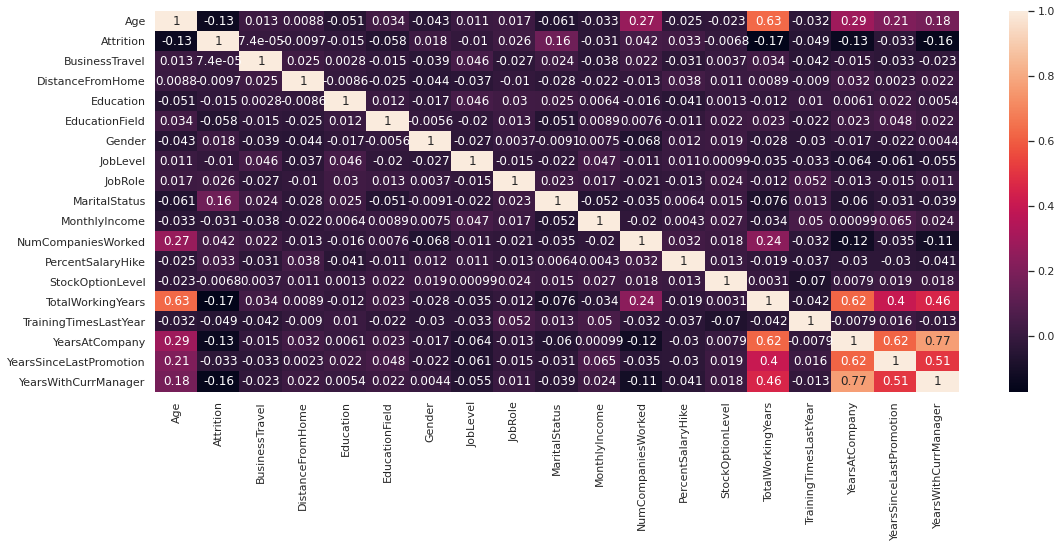

In [39]:
corr = corr_cols.corr()
plt.figure(figsize=(18,7))
sns.heatmap(corr, annot = True)
plt.show()

In [40]:
y = df['Attrition']
x = df.drop('Attrition', axis = 1)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

StandardScaling: 평균이 0 표준편차가 1이 되도록 변환

In [42]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8378684807256236
[[732   9]
 [134   7]]
